# Programming Assignment 5: Central Limit Theorem & Monte Carlo

### CS70 — Foundations of Applied Computer Science
---

This notebook contains literate code, i.e. brief fragments of Python surrounded by descriptive text (using Markdown). Please complete/extend this notebook for your homework submission:

* For any mathematical questions, make sure to **show you work**.
* For any questions that ask for code, please **also provide a short description of what your solution is doing and how it works**, either by adding comments or in an extra markdown cell.

Make sure to use the reference Python distribution so that project files can be opened by the TAs. In this course, we use [Anaconda](https://www.anaconda.com/products/individual), specifically the version based on Python 3.8.

<div class="alert alert-warning">
Homework assignments in CS70 count towards your final grade and must therefore be done individually.
</div>

## Import Statements

We provide the import statements required to complete the assignment in the following cell. 

<div class="alert alert-danger" role="alert">
    <b>Import Policy:</b> You must not use any <code>import</code>'s other than the ones we provide.
</div>

<div class="alert alert-info" role="alert">
    <b>Run</b> the following cell in the Jupyter Notebook to include the required modules. It imports several libraries such as NumPy and Matplotlib and configures them to produce nice graphics.
</div>

$$
\newcommand{\E}[1]{\mathbb{E}\left[#1\right]}
\newcommand{\V}[1]{\mathbb{V}\left[#1\right]}
\newcommand{\dif}{\,\mathrm{d}}
\newcommand{\Reals}{\mathbb{R}}
$$

In [1]:
import numpy as np # Building & Manipulating Matrices

# MatPlotLib
import matplotlib.pyplot as plt
from ipywidgets import interact
from matplotlib import gridspec

# SciPy
import scipy as scipy
from scipy.integrate import quad
from scipy.stats import norm

# SymPy
import sympy as sympy

# Figure Interactivity
%matplotlib inline

# Retina Graphics (High-Resolution Screens)
%config InlineBackend.figure_format = 'retina'

## Objectives

* Understand the Central Limit Theorem.
* Understand continuous random variables, the probability density function (pdf), expected values, and variance.
* Understand how transforming a random variable affects its pdf, expected value, and variance.
* Apply the above concepts to numerical integration using Monte Carlo and derive and visualize its convergence rate.
* Get additional practice with NumPy (writing vectorized functions), Jupyter (interactive histogram plots), SymPy (symbolic integration), and SciPy (numerical quadrature).

# Part 1: Central Limit Theorem

## Introduction

The [**Central Limit Theorem**](https://en.wikipedia.org/wiki/central_limit_theorem) states that the sum of any independent random variables converges towards a normal distribution (under proper normalization). It is **not** required that the individual variables are normally distributed.

We're going to visualize this with a simple interactive *matplotlib* figure.

We can easily generate a huge array of (uniform) random variables with *NumPy*:

In [2]:
# Generate an array of uniform random variables.
samples = np.random.uniform(size = 10)

# Display the array.
print(samples)

[0.59010031 0.40064207 0.63726506 0.39279747 0.47803096 0.23658459
 0.92036798 0.64464853 0.4189911  0.87176273]


Let's plot such a distribution with a histogram:

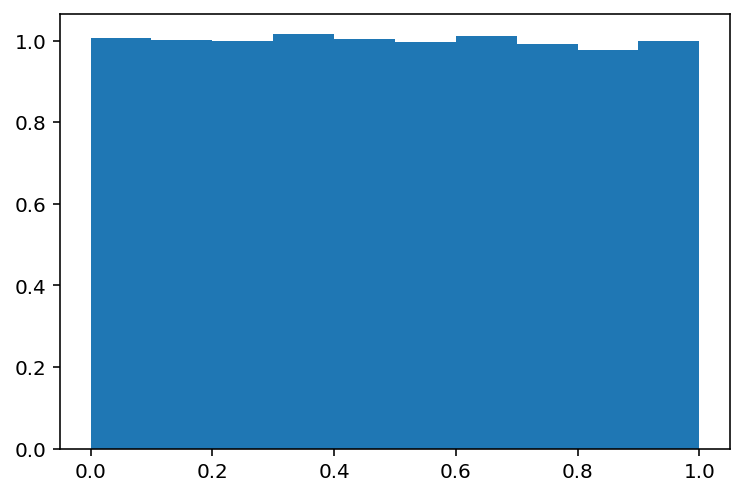

In [3]:
# Create the histogram, using a normalized probability density.
plt.hist(np.random.uniform(size = 100000), density = True)

# Display the histogram (plot).
plt.show()

## Problem 1.1: Histogram of a Uniform Random Number

Now, customize this a bit.

*Hint: To figure out how to do this, get more information about the `hist` function by typing the following into a Python cell in the notebook:*

```python
help(plt.hist)
```

<div class="alert alert-info" role="alert">

**TODO:** Plot the histogram as a normalized probability density using 50 bins. Put your modified code in the cell below.
</div> 

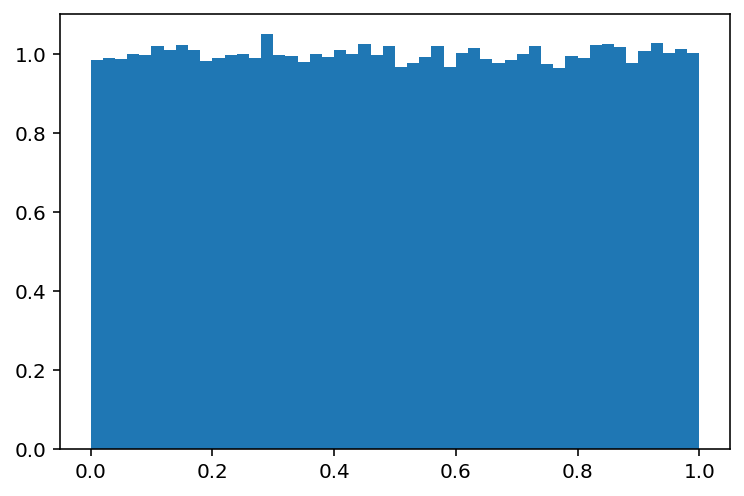

In [4]:
# Create the histogram, using a normalized probability density with 50 bins.
plt.hist(np.random.uniform(size = 100000), bins = 50, density = True)

# Display the histogram (plot).
plt.show()

## Problem 1.2: Histogram of Sums of Many Random Numbers

To check the Central Limit Theorem however, we need to consider the distribution of the **sums** of many random variables. This is also easy in NumPy by generating a 2d-array (or a matrix) of random values (check the `size` parameter of the `np.random.uniform` function) and then summing over one of the dimensions.

<div class="alert alert-info" role="alert">

**TODO:** Create a histogram, much like the above, but this time for the sum of $ n $ random variables. Try out different values of $ n $. For large $ n $, it should converge to a normal distribution! Before you finish, set $ n = 10 $.
</div>

*Hint:* Check the function `np.sum` either in the notebook by typing `help(np.sum)` or by browsing the online NumPy documentation (accessible from the help menu).

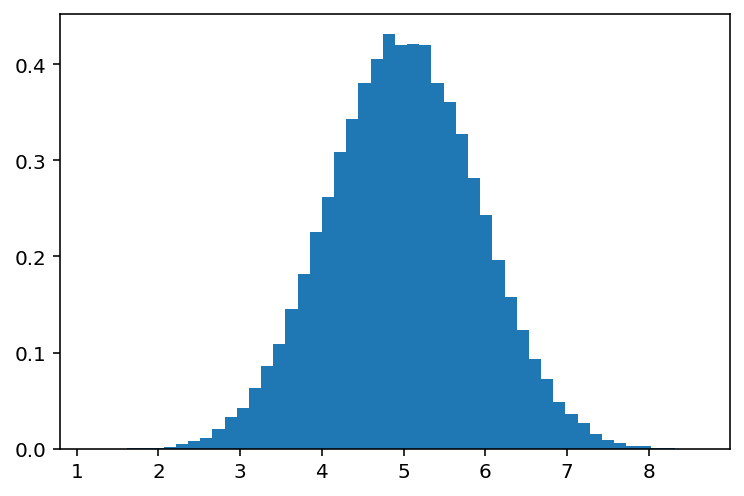

In [5]:
n = 10

# Generate samples, this time a 100,000 x n matrix.
array_samples = np.random.uniform(size = (100000, n))

# Sum up the elements in each column.
histogram_samples = np.sum(array_samples, axis = 1)

# Create the histogram, using a normalized probability density with 50 bins.
plt.hist(histogram_samples, bins = 50, density = True)

# Display the histogram (plot).
plt.show()

## Problem 1.3: Interactive Histogram

Let's make the figure interactive so we can play with $ n $.

We already imported a module above that enables interactivity. This allows creating an interactive slider by wrapping a function with a `@interact` decorator.

<div class="alert alert-info" role="alert">
    
**TODO:** Complete the function `central_limit_theorem` function below by pasting your solution from [Problem 1.2](#Problem-1.2:-Histogram-of-Sums-of-Many-Random-Numbers) above but using the $ n $ passed into the function. Make sure to add a title (see `help(plt.title)`) to your plot.
</div>

In [6]:
@interact(n = (1, 20))
def central_limit_theorem(n = 1): # The default parameter is the default slider position.
    # Generate samples, this time a 100000 x n matrix.
    array_samples = np.random.uniform(size = (100000, n))

    # Sum up the elements in each column.
    histogram_samples = np.sum(array_samples, axis = 1)
    
    # Create the histogram, using a normalized probability density with 50 bins.
    plt.hist(histogram_samples, bins = 50, density = True)
    
    # Title the plot.
    plt.title('Central Limit Theorem (Random Uniform Samples) | n = {}'.format(n))
    
    # Display the histogram (plot).
    plt.show()

interactive(children=(IntSlider(value=1, description='n', max=20, min=1), Output()), _dom_classes=('widget-int…

## Problem 1.4: Expected Value & Variance

As we can see above, as we add more random numbers together, both the center of mass and spread of the distribution changes. We can quantify these concepts mathematically using the *expected value* and *variance*.

Recall that if $ X $ is a continuous random variable over the real line with probability density function $ p_X \left( x \right) $, then its expected value is given by the integral:
$$ \E{X} = \int_\mathbb{R} x \, p_X \left( x \right) \dif x, $$
and its variance by:
$$
\begin{align}
    \V{X} &= \int_\mathbb{R} \left( x - \E{X} \right)^2 \, p_X \left( x \right) \dif x, \\
    &= \int_\mathbb{R} x^2 \, p_X \left( x \right) \dif x - \E{X}^2 \\
    &= \E{X^2} - \E{X}^2
\end{align}
$$

### Problem 1.4.1
<div class="alert alert-info" role="alert">

**TODO:** Derive the expected value and variance of the canonical uniform random variable $ X \sim \text{Uniform} \left( 0, 1 \right) $, which has a pdf:
$$
p_X \left( x \right) =
\begin{cases}
    1 & \text{if $ 0 \leq x < 1 $,} \\
    0 & \text{otherwise.}
\end{cases}
$$
</div>

#### Expected Value

Expected value is defined as follows:
$$ E \left[ X \right] = \int_{-\infty}^\infty x p \left( x \right) \dif x $$

Thus, to derive the expected value of the canonical uniform random variable $ X \sim \text{Uniform} \left( 0, 1 \right) $, which has pdf
$$
p_X \left( x \right) =
\begin{cases}
    1 & \text{if $ 0 \leq x < 1 $,} \\
    0 & \text{otherwise.}
\end{cases}
$$
we may take the following integral
$$ E \left[ x \right] = \int_0^1 x \dif x $$

Evaluating the integral, we have
$$ E \left[ x \right] = \int_0^1 x \dif x = \left[ \frac{1}{2} x^2 \right]_0^1 = \frac{1}{2} $$

Thus, $ E \left[ X \right] = \frac{1}{2} $.

---

#### Variance
Variance is defined as follows:
$$ V \left[ X \right] = E \left[ \left( X - E \left[ X \right] \right)^2 \right] = E \left[ X^2 \right] - E \left[ X \right]^2 $$

Thus, to derive the variance of the canonical uniform random variable $ X \sim \text{Uniform} \left( 0, 1 \right) $, which has pdf
$$
p_X \left( x \right) =
\begin{cases}
    1 & \text{if $ 0 \leq x < 1 $,} \\
    0 & \text{otherwise.}
\end{cases}
$$
we may compute $ E \left[ X^2 \right] $ in a similar fashion to what was accomplished previously, by taking the following integral
$$ E \left[ x \right] = \int_0^1 x^2 \dif x $$

Evaluating the integral, we have
$$ E \left[ x \right] = \int_0^1 x^2 \dif x = \left[ \frac{1}{3} x^3 \right]_0^1 = \frac{1}{3} $$

Now, with the understanding that $ E \left[ X \right] = \frac{1}{2} $, we may calculate the following expression
$$ V \left[ X \right] = E \left[ X^2 \right] - E \left[ X \right]^2 = \frac{1}{3} - \left( \frac{1}{2} \right)^2 $$
which simplifies to
$$ V \left[ X \right] = \frac{1}{12} $$

### Problem 1.4.2

Recall that for independent random variables, both the *expected value and variance are additive*. Meaning, the expected value of a sum is the sum of expected values (and ditto for variance).

<div class="alert alert-info" role="alert">

**TODO:** Write a small Python function that returns both the mean and variance of the sum of $ n $ independent uniform random numbers.
</div>

In [7]:
# Given that the mean of a uniform random variable is 1/2 and the variance of a uniform random variable is 1/12...
# Computing the sum of n independent uniform random variables is rather simple.

def mean_and_variance_of_uniform_sum(n):
    return (n / 2, n / 12)

## Problem 1.5: The Normal Distribution

To verify that the samples are indeed normally distributed, we will overlay a true normal distribution on top of the histogram.

The normal distribution is given by:

$$ \mathcal{N} \left( x \; | \; \mu, \sigma^2 \right) = \frac{1}{\sqrt{2 \pi \sigma^2}} \mathrm{e}^{-\frac{\left( x - \mu \right)^2}{2 \sigma^2}} $$

where $ \mu $ is the mean (expected value) of the distribution and $ \sigma^2 $ is its variance.

<div class="alert alert-info" role="alert">

**TODO:** Implement this equation using NumPy in the Python function below. Your function should work whether `x` is a single value or a NumPy array. Your solution should contain no for loops, but use vectorized NumPy functions and operators instead.
</div>

*Hint:* You will find `np.sqrt()`, `np.pi` and `np.exp()` useful. Recall that raising a value (or all elements of a NumPy array) to a power can be performed using the `**` operator.

In [8]:
def normal_distr(x, mu, sigma):
    # Create the coefficient for the expression.
    coefficient = 1 / np.sqrt(2 * np.pi * (sigma ** 2))
    
    # Create the exponent for the expression
    exponent = -((x - mu) ** 2) / (2 * (sigma ** 2))
    
    # Return the appropriate result, as given by the formula.
    return coefficient * (np.exp(exponent))

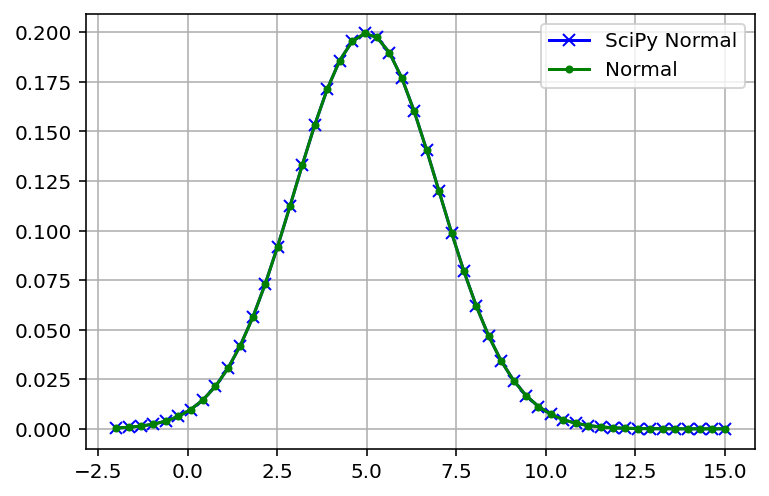

The average difference is 4.3635e-35.


In [9]:
# You can test your function against the one provided by SciPy.

# Set mean and standard deviation values.
mu = 5
sigma = 2

# Create linear space from -2.0 to 15.0.
x = np.linspace(-2.0, 15.0)

# Calculate the normal distribution in two ways.
n1 = norm.pdf(x, mu, sigma)
n2 = normal_distr(x, mu, sigma)

# Plot the normal distributions accordingly.
plt.plot(x, n1, '-bx', label = 'SciPy Normal')
plt.plot(x, n2, '-g.', label = 'Normal')

# Add a legend and grid.
plt.legend()
plt.grid()

# Display the plot.
plt.show()

print(f'The average difference is {np.mean((n1 - n2) ** 2):1.5g}.')

We can also time the performance of our function (or any line of code) using the "magic" `%timeit` Jupyter command. Let's compare your implementation to the SciPy one:

In [10]:
%timeit -n 1000 norm.pdf(x, mu, sigma)
%timeit -n 1000 normal_distr(x, mu, sigma)

67.5 µs ± 14.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
7.11 µs ± 49.4 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## Problem 1.6: Convergence to the Normal Distribution

<div class="alert alert-info" role="alert">

**TODO:** Now, copy your solution to [Problem 1.3](#Problem-1.3:-Interactive-Histogram) as a starting point, and additionally superimpose a plot (check `plt.plot`) of your normal distribution over the histogram. Set the mean and standard deviation of the normal to the expected mean and standard deviation of $ n $ sample sums given by your `mean_and_variance_of_uniform_sum` function.

Finally, add a legend by adding labels to both the `plt.hist` and `plt.plot` commands (pass the `label` parameter).
</div>

*Hint: To plot the normal over the same horizontal range as your histogram, save the second return value of the `plt.hist` function using something like `_, x, _ = plt.hist(...)`.*

In [11]:
@interact(n = (1, 20))
def central_limit_theorem(n = 1): # The default parameter is the default slider position.
    # Generate samples, this time a 100000 x n matrix.
    array_samples = np.random.uniform(size = (100000, n))

    # Sum up the elements in each column.
    histogram_samples = np.sum(array_samples, axis = 1)
    
    # Create the histogram, using a normalized probability density with 50 bins.
    _, x, _ = plt.hist(histogram_samples, bins = 50, density = True, label = 'Histogram')
    
    # Set the mean and standard deviation of the normal based on the created function.
    mu, sigma = mean_and_variance_of_uniform_sum(n)
    
    # Superimposing a plot of the normal distribution over the histogram.
    plt.plot(x, normal_distr(x, mu, np.sqrt(sigma)), '-g', label = 'Normal Distribution')
    
    # Add a legend.
    plt.legend()
    
    # Title the plot.
    plt.title('Central Limit Theorem (Random Uniform Samples) | n = {}'.format(n))
    
    # Display the plot.
    plt.show()  

interactive(children=(IntSlider(value=1, description='n', max=20, min=1), Output()), _dom_classes=('widget-int…

If everything went according to plan, your interactive plot above should show a smooth normal distribution that matches the shape of the underlying histogram increasingly well as $ n $ increases.

# Part 2: Transforming Random Variables

We saw in [Part 1](#Part-1:-Central-Limit-Theorem) that the sum of many random variables leads to a normal distribution. Now we examine how the pdf of a random variable changes if we transform it via a continuous monotonic function.

Consider the uniform random variable $ X \in \left[ 0, 1 \right) $. Let's generate many realizations of this random variable and plot its histogram:

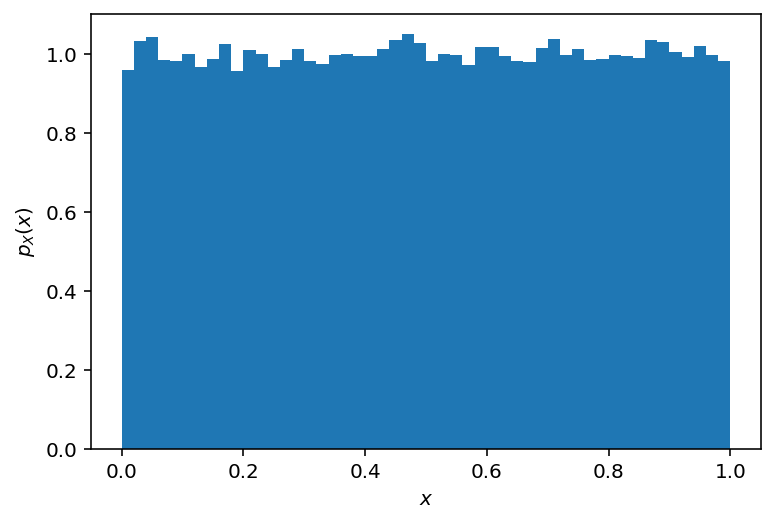

In [12]:
# Generate an array of uniform random variables.
X = np.random.uniform(size = 100000)

# Create the histogram, using a normalized probability density with 50 bins.
plt.hist(X, bins = 50, density = True)

# Add x and y labels to the plot.
plt.xlabel(r'$ x $')
plt.ylabel(r'$ p_X \left( x \right) $')

# Display the plot.
plt.show()

## Problem 2.1: Linear Ramp

If we take a random variable $ X $ and pass it through some function, say $ g \left( x \right) = \sqrt{x} $, we get another random variable $ Y = g \left( X \right) $.

Let's look at its distribution.

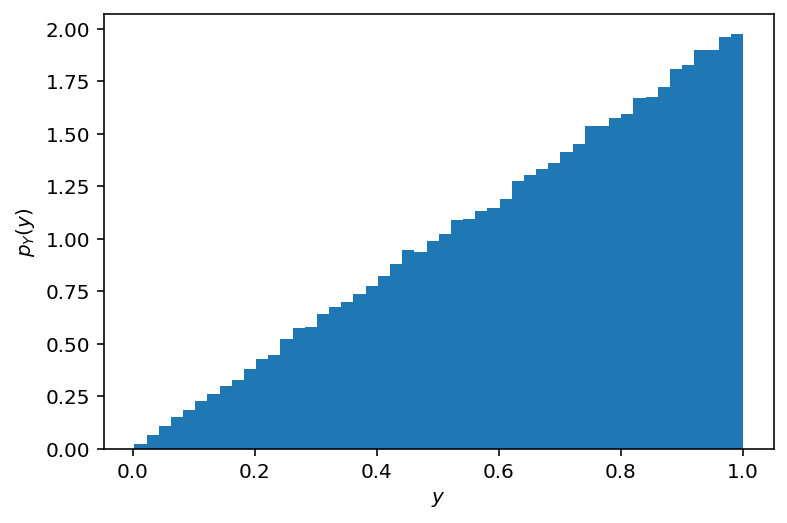

In [13]:
# Create a new function to pass the random variable X through.
def g(x):
    return np.sqrt(x)

# Generate an array of uniform random variables.
X = np.random.uniform(size = 100000)

# Generate an array of transformed random variables.
Y = g(X)

# Create the histogram, using a normalized probability density with 50 bins.
plt.hist(Y, bins = 50, density = True)

# Add x and y labels to the plot.
plt.xlabel(r'$ y $')
plt.ylabel(r'$ p_Y \left( y \right) $')

# Display the plot.
plt.show()

### Problem 2.1.1: Deriving The PDF

The histogram above looks remarkably like a linear ramp (going from $ p_Y \left( 0 \right) = 0 $ to $ p_Y \left( 1 \right) = 2 $). It seems that taking the square root of a uniform random number gives us a random number that has a linearly increasing density.

<div class="alert alert-info" role="alert">
    
**TODO:** Prove that this is true by mathematically deriving the probability density $ p_Y \left( y \right) $. Your final result should be an expression for $ p_Y \left( y \right) $ in terms of $ y $.
</div>

*Hint:* Recall that passing a random variable $ X $ through a continuous monotonic function $ g $ changes the pdf in the following way:

$$
\begin{align}
    p_Y \left( y \right) = p_Y \left( g \left( x \right) \right) &= \frac{p_X \left( x \right)}{\vert g' \left( x \right)\vert} \\
    &= \frac{p_X \left( g^{-1} \left( y \right) \right)}{\vert g' \left( g^{-1} \left( y \right) \right) \vert} \\
\end{align}
$$

#### Deriving The PDF

To prove that the histogram is a linear ramp from $ p_X \left( 0 \right) $ to $ p_X \left( 1 \right) = 2 $, i.e. taking the square root of a uniform random number gives us a random number that has a linearly increasing density, we use the following understanding:

Passing a random variable $ X $ through a continuous monotonic function $ g $ changes the PDF in the following way:
$$
\begin{align}
    p_Y \left( y \right) = p_Y \left( g \left( x \right) \right) &= \frac{p_X \left( x \right)}{\vert g' \left( x \right)\vert} \\
    &= \frac{p_X \left( g^{-1} \left( y \right) \right)}{\vert g' \left( g^{-1} \left( y \right) \right) \vert} \\
\end{align}
$$

Thus, given the expression $ g \left( x \right) = \sqrt{x} = x^\frac{1}{2} $, we know that $ g' \left( x \right) = \frac{1}{2} x^{-\frac{1}{2}} $ and $ g^{-1} \left( y \right) = y^2 $. Using this information, we find that
$$ p_Y \left( y \right) = p_Y \left( g \left( x \right) \right) = \frac{p_X \left( x \right)}{\vert g' \left( x \right) \vert} = \frac{1}{\vert \frac{1}{2} x^{-\frac{1}{2}} \vert} $$

Using the inverse, we find that
$$ p_Y \left( y \right) = \frac{1}{\vert \frac{1}{2} x^{-\frac{1}{2}} \vert} = \frac{1}{\vert \frac{1}{2} \left( y^2 \right)^{-\frac{1}{2}} \vert} $$
which simplifies to
$$ p_Y \left( y \right) = \frac{1}{\vert \frac{1}{2} \left( y^2 \right)^{-\frac{1}{2}} \vert} = \vert 2y \vert $$

Thus, we have determined that $ p_Y \left( y \right) = \vert 2y \vert $, which follows from the observation that the histogram is a linear ramp with $ p_Y \left( 0 \right) = 0 $ and $ p_Y \left( 1 \right) = 2 $.

### Problem 2.1.2: Vectorized Implementation in NumPy

<div class="alert alert-info" role="alert">

**TODO:** Confirm that your derivation is correct by writing a Python function `p_Y(y)` that implements your derived analytic PDF. Your function should work when passing in a NumPy array of $ y $ values, each element of which could be any real number (i.e., not just values between zero and one).
</div>

*Hint:* Note that many operators work elementwise for NumPy arrays. You may find the comparison `<=`, `>=` and logical `&` operators useful. If you prefer, you are also allowed to use the functions like `np.piecewise` or `np.where`, but it is possible to achieve with simple logical operators as well.

Once implemented, you can then use the code below to confirm your function is correct. It plots the empirical histogram and your analytic pdf over the range $ -0.5 \leq y \leq 1.5 $. (The `np.linspace` function generates a vector of uniformly spaced values.)

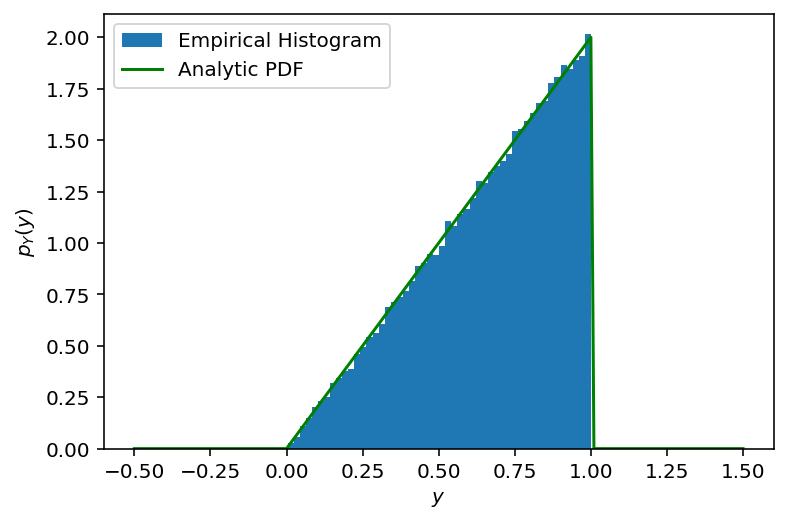

In [14]:
# Create a new function to determine the PDF.
def p_Y(y):
    return ((y >= 0) & (y <= 1)) * 2 * y

# Generate an array of uniform random variables.
X = np.random.uniform(size = 100000)

# Generate an array of transformed random variables.
Y = g(X)

# Create the histogram, using a normalized probability density with 50 bins.
plt.hist(Y, bins = 50, density = True, label = 'Empirical Histogram')

# Create linear space from -0.5 to 1.5 with 201 data points.
y = np.linspace(-0.5, 1.5, 201)

# Superimposing a plot of the analytic PDF over the histogram.
plt.plot(y, p_Y(y), '-g', label = 'Analytic PDF')

# Add x and y labels to the plot.
plt.xlabel(r'$ y $')
plt.ylabel(r'$ p_Y \left( y \right) $')

# Add a legend.
plt.legend()

# Display the plot.
plt.show()

## Problem 2.2

Now let's consider the random variable $ Z = h \left( X \right) $ where $ h \left( x \right) $ is the composition of two transformations: $ h \left( x \right) = \left( f \circ g \right) \left( x \right) $ (recall that the $ \circ $ notation denotes function composition $ \left( f \circ g \right) \left( x \right) := f \left( g \left( x \right) \right) $). We define $ y := g \left( x \right) = \frac{\pi}{2} x $ and $ z := f \left( y \right) = \tfrac{\pi}{2} \sin \left( y \right) $. Hence, $ h \left( x \right) = \tfrac{\pi}{2} \sin \left( \tfrac{\pi}{2} x \right) $.

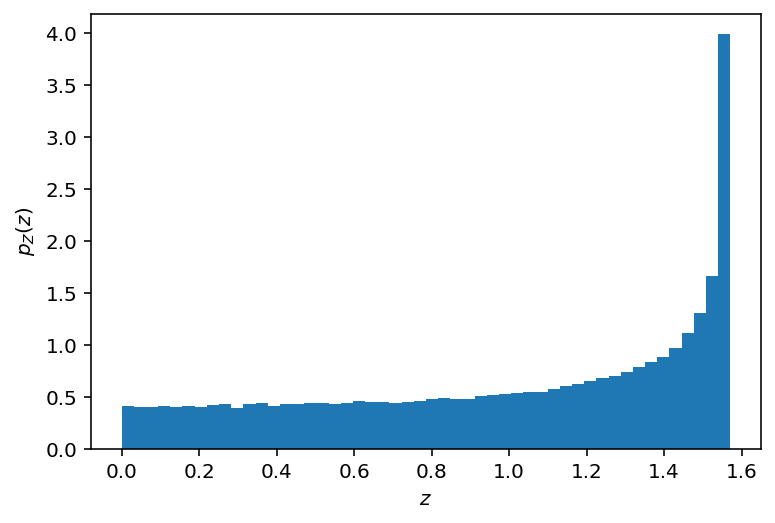

In [15]:
# Create a new function to pass the random variable X through.
def h(x):
    return np.pi * 0.5 * np.sin(np.pi * x * 0.5)

# Generate an array of uniform random variables.
X = np.random.uniform(size = 100000)

# Generate an array of transformed random variables.
Z = h(X)

# Create the histogram, using a normalized probability density with 50 bins.
plt.hist(Z, bins = 50, density = True)

# Add x and y labels to the plot.
plt.xlabel(r'$ z $')
plt.ylabel(r'$ p_Z \left( z \right) $')

# Display the plot.
plt.show()

### Problem 2.2.1: Deriving the PDF

<div class="alert alert-info" role="alert">

**TODO:** Mathematically derive the probability density $p_Z(z)$. Your final result should be an expression for $p_Z(z)$ as a function of $z$.
</div>

*Hint:* While you can handle $h$ as a single transformation, you may find it easier to first compute $p_Y(y)$ via the transformation $g : X \mapsto Y$ and then $p_Z(z)$ via the transform $f : Y \mapsto Z$.

#### Deriving The PDF

To mathematically derive the probability density $ p_Z \left( z \right) $, we first compute $ p_Y \left( Y \right) $ via the transformation $ g : X \mapsto Y $ and then $ p_Z \left( z \right) $ via the transform $ f : Y \mapsto Z $.

Let us use the following understanding:

Passing a random variable $ X $ through a continuous monotonic function $ g $ changes the PDF in the following way:
$$
\begin{align}
    p_Y \left( y \right) = p_Y \left( g \left( x \right) \right) &= \frac{p_X \left( x \right)}{\vert g' \left( x \right)\vert} \\
    &= \frac{p_X \left( g^{-1} \left( y \right) \right)}{\vert g' \left( g^{-1} \left( y \right) \right) \vert} \\
\end{align}
$$

Thus, given the expression $ g \left( x \right) = \frac{\pi}{2} x $, we know that $ g' \left( x \right) = \frac{\pi}{2} $ and $ g^{-1} \left( y \right) = \frac{2}{\pi} y $. Using this information, we find that
$$ p_Y \left( y \right) = p_Y \left( g \left( x \right) \right) = \frac{p_X \left( x \right)}{\vert g' \left( x \right) \vert} = \frac{1}{\vert \pi / 2 \vert} $$
which simplifies to
$$ p_Y \left( y \right) = \frac{2}{\pi} $$

We do not need to use the inverse, as this expression does not depend on $ x $.

Thus, we have determined that $ p_Y \left( y \right) = \frac{2}{\pi} $, which follows from the observation that we are simply scaling the input values to a different range while maintaining 'uniform' property.

---

#### Next Steps

Now, we calculate $ p_Z \left( z \right) $ via the transform $ f : Y \mapsto Z $.

Let us use the following understanding:

Passing a random variable $ Y $ through a continuous monotonic function $ f $ changes the PDF in the following way:
$$
\begin{align}
    p_Z \left( z \right) = p_Z \left( f \left( y \right) \right) &= \frac{p_Y \left( y \right)}{\vert f' \left( y \right)\vert} \\
    &= \frac{p_Y \left( f^{-1} \left( z \right) \right)}{\vert f' \left( f^{-1} \left( z \right) \right) \vert} \\
\end{align}
$$

Thus, given the expression $ f \left( y \right) = \frac{\pi}{2} \sin \left( y \right) $, we know that $ f' \left( y \right) = \frac{\pi}{2} \cos \left( y \right) $ and $ f^{-1} \left( z \right) = \sin^{-1} \left( \frac{2}{\pi} z \right) $. Using this information, we find that
$$ p_Z \left( z \right) = p_Z \left( f \left( y \right) \right) = \frac{p_Y \left( y \right)}{\vert f' \left( y \right)\vert} = \frac{\frac{2}{\pi}}{\vert \frac{\pi}{2} \cos \left( y \right) \vert} $$

(This is because $ p_Y \left( y \right) = 2 / \pi $ from the previous part.)

Using the inverse, we find that
$$ p_Z \left( z \right) = \frac{\frac{2}{\pi}}{\vert \frac{\pi}{2} \cos \left( y \right) \vert} = \frac{\frac{2}{\pi}}{\vert \frac{\pi}{2} \cos \left( \sin^{-1} \left( \frac{2}{\pi} z \right) \right) \vert} $$
which simplifies to
$$ p_Z \left( z \right) = \frac{4}{\pi^2 \vert \cos \left( \sin^{-1} \left( \frac{2}{\pi} z \right) \right) \vert} $$

Thus, we have determined that $ p_Z \left( z \right) = \frac{4}{\pi^2 \vert \cos \left( \sin^{-1} \left( \frac{2}{\pi} z \right) \right) \vert} $, which will be tested in the following part.

_Note: The function $ \sin^{-1} \left( z \right) $ is only defined from $ -1 $ to $ 1 $, thus the function $ \sin^{-1} \left( \frac{2}{\pi} z \right) $ is only defined from $ -\frac{\pi}{2} $ to $ \frac{\pi}{2} $. This is not a concern, as we are only considering an interval from $ 0 $ to $ \frac{\pi}{2} $ in this case._

When taking the value $ \cos \left( \sin^{-1} \left( \frac{2}{\pi} z \right) \right) $ with an interval of $ 0 $ to $ \frac{\pi}{2} $, the only possible range is $ \geq 0 $, thus we may remove the absolute value from the expression. The final result is
$$ p_Z \left( z \right) = \frac{4}{\pi^2 \cos \left( \sin^{-1} \left( \frac{2}{\pi} z \right) \right)} $$

### Problem 2.2.2: Vectorized implementation using NumPy

<div class="alert alert-info" role="alert">

**TODO:** Write a vectorized Python function `p_Z(z)` and plot it atop the histogram using the code below to validate your derivation.
</div>

*Hint:* To implement this in a vectorized way, you may find it useful to select elements of a vector that match a certain criterion, e.g. given a vector `z`, `z[z < 1]` would index all elements that are less than 1. If you prefer, you are also allowed to use the functions like `np.piecewise` or `np.where`, but it is possible to achieve this with clever conditional indexing.

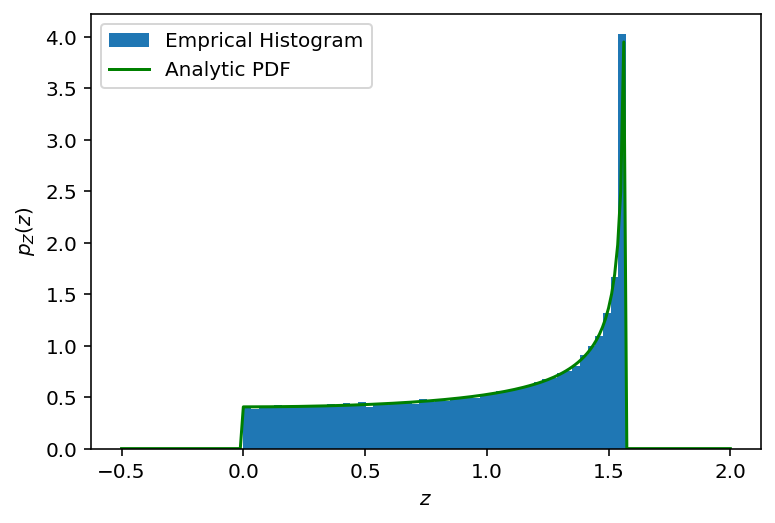

In [16]:
# Create a new function to determine the PDF.
def p_Z(z):
    return ((z >= 0) & (z <= np.pi / 2)) * 4 / (np.pi ** 2 * np.cos(np.arcsin((2 * z / np.pi) % 1)))
    
    # Alternative
    # return np.piecewise(z, [z < 0, z >= 0, z > np.pi / 2], [0, lambda z: 4 / (np.pi ** 2 * np.cos(np.arcsin((2 * z / np.pi) % 1))), 0])

# Generate an array of transformed random variables.
Z = h(np.random.uniform(size = 100000))

# Create the histogram, using a normalized probability density with 50 bins.
plt.hist(Z, bins = 50, density = True, label = 'Emprical Histogram')

# Create linear space from -0.5 to 1.5 with 201 data points.
z = np.linspace(-0.5, 2, 201)

# Superimposing a plot of the analytic PDF over the histogram.
plt.plot(z, p_Z(z), '-g', label = 'Analytic PDF')

# Add x and y labels to the plot.
plt.xlabel(r'$ z $')
plt.ylabel(r'$ p_Z \left( z \right) $')

# Add a legend.
plt.legend()

# Display the plot.
plt.show()

# Part 3: Integration

We will now build on these concepts to derive and visually explore some fundemental properties of numerical integration using the Monte Carlo method.

We'll be working with this simple definite integral:
$$ F := \int_0^\frac{\pi}{2} \sin(x) \dif x $$

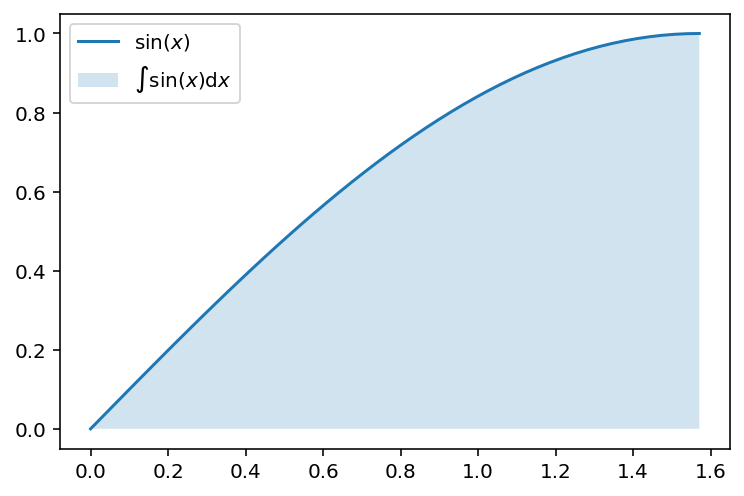

In [17]:
x = np.linspace(0.0, np.pi/2)
f = np.sin(x)

plt.plot(x, f, label=r'$\sin(x)$')
plt.fill_between(x, f, alpha=0.2, label=r'$\int \sin(x) \mathrm{d}x$')
plt.legend()
plt.show()

## Analytic integration
For such a simple integral, we can work out the answer analytically using some basic calculus:

$$
\begin{align}
\int_0^\frac{\pi}{2} \sin(x) \dif x  &= \left.\cos(x)\Large\right\vert_0^\frac{\pi}{2} = \cos(\tfrac{\pi}{2}) - \cos(0)\\
  &= 1.
\end{align}
$$

In fact, for such simple integrands, we can even have Python work out the solution for us analytically using the [SymPy symbolic mathematics library](https://sympy.org/).

In [18]:
sympy.init_printing(use_latex = True)
x, a, b = sympy.symbols("x a b")
print(sympy.integrate(sympy.sin(x), (x, a, b)))
a = 0
b = sympy.pi/2
print(sympy.integrate(sympy.sin(x), (x, a, b)))

cos(a) - cos(b)
1


## Numerical integration
The expression we wish to integrate is very simple here, so calculating its integral analytically is easy (even without resorting to Python’s symbolic mathematics package!). In many practical cases, however, analytical approaches to integration are not feasible. This could be because the expression we wish to integrate is very complicated (e.g. without a closed analytic form), or because it is a "black box" (for instance, the physical world) where we can evaluate or measure the function at various points, but don't know a corresponding equation.

In those scenarios, we can fall back to numerical integration techniques.

### Deterministic quadrature

You may recall from your calculus class that integrals can be numerically evaluated using *quadrature* methods (such as a Riemann sum, or the trapazoid or Simpson rules). This is easy to do in Python, and SciPy even has a dedicated function for quadrature:

In [19]:
y, err = quad(scipy.sin, 0, np.pi/2)
print(y)

0.9999999999999999


The error of deterministic quadrature is $O(n^{-2})$ where $n$ is the number of evaluation points along each dimension of the integral, for a total of $O(n^d)$ evaluation points for $d$-dimensional integrals. This is great when the dimensionality is low, e.g. for $1d$ the error falls off quadratically compared to the work involved. Unfortunately, since the amount of work grows exponentially with the dimension $d$, these approaches become infeasible once $d$ grows beyond a modest number. This is known as the *curse of dimensionality*.

### Monte Carlo integration

As we will see in this section, Monte Carlo integration avoids the curse of dimensionality and is therefore a great alternative for high-dimensional problems.

The basic idea of Monte Carlo integration is very simple: it transforms the problem of integration into one of estimating an expected value. The trick is to first construct a random variable whose expected value is equal to our integral of interest. Monte Carlo then estimates this expected value by averaging random realizations of the variable, which in turn approximates the integral.

To see how we might achieve this, recall that the expected value of a random variable $X$ on the real line can itself be expressed as an integral:

$$
\begin{align}
\E{X} &= \int_\Reals x \, p_X(x) \dif x,
\end{align}
$$

where $X \sim p_X$ is drawn from density $p_X$.

In [Part 2](#Part-2:-Transforming-Random-Variables) above, we saw that applying a function ($h$) to a random variable ($X$) gives us another random variable ($Z = h(X)$). We can express its expected value as:

$$
\begin{align}
\E{h(X)} &= \int_\Reals h(x) \, p_X(x) \dif x.
\end{align}
$$

The above equation establishes a link between the expected value of $h(X)$ and an integral involving the function $h$. Unfortunately, this is not quite what we want since the integrand also includes the pdf of the random variable.

We are interested in an integral $\int_\Reals f(x) \dif x$. To handle this, we can simply define our function $h$ to be:

$$
h(x) := \frac{f(x)}{p_X(x)},
$$

which, when inserting into the definition of $\E{h(X)}$ above, gives:

$$
\require{cancel}
\E{h(X)} = \int_\Reals \frac{f(x)}{\cancel{p_X(x)}} \, \cancel{p_X(x)} \dif x = \int_\Reals f(x) \dif x.
$$

We've successfully defined a random variable ($Z = \frac{f(X)}{p_X(X)}$) whose expected value is equal to our integral of interest. Estimating this expected value by simply averaging $n$ independent evaluations of $Z$ gives rise to the **standard Monte Carlo estimator**:

$$
\begin{align}
F_n &= \frac{1}{n}\sum_{i=1}^{n} \frac{f(x_i)}{p_X(x_i)} \approx F
\end{align}
$$

## Problem 3.1: Monte Carlo Estimator

Let's see this in action.

Our goal is to use Monte Carlo to approximate the definite integral from before,

$$
\begin{align}
F &:= \int_a^b f(x) \dif x,
\end{align}
$$

where $f(x) = \sin(x)$ and $a = 0$ and $b=\frac{\pi}{2}$.

We know from above that the analytic answer to this integral is simply $F = 1$.

<div class="alert alert-info" role="alert">

**TODO:** Given a canonical uniform random variable $X \in [0,1]$, write out a mathematical equation for the standard Monte Carlo estimator of this integral using $n$ **uniform** samples (constant PDF) over the integration domain. Note that $X$ does not cover your entire integration domain, so you will need to transform it so it uniformly covers the domain of integration.
</div>

*Hint: once simplified, the summands in the Monte Carlo estimator should be realizations of the variable $Z$ and the Python function `h(x)` that we defined earlier in [Problem 2.2](#Problem-2.2)*

As indicated above, the standard Monte Carlo estimator is expressed as
$$ F_n = \frac{1}{n}\sum_{i=1}^{n} \frac{f(x_i)}{p_X(x_i)} \approx F $$

Thus, given a canonical uniform random variable $ X \in \left[ 0, 1 \right] $, which does not cover the entire integration domain, we must transform it so it uniformly covers the domain of integration. Such a transformation gives rise to a probability distribution of $ 1 / \frac{\pi}{2} = \frac{2}{\pi} $. Thus, we let
$$ p_Z \left( z_i \right) = \frac{2}{\pi} $$
where $ Z $ is the transformed variable for the given integral.

Thus, when using $ F_n = \frac{1}{n}\sum_{i=1}^{n} \frac{f(x_i)}{p_X(x_i)} \approx F $, we find the following:
$$ F_n \approx \frac{1}{n} \sum_{i = 1}^n \frac{\sin \left( x_i \right)}{2 / \pi} $$
which simplifies to
$$ F_n \approx \frac{1}{n} \sum_{i = 1}^n \frac{\pi}{2} \sin \left( x_i \right) $$

Given that we have a change of variables from $ X \sim U \left( 0, 1 \right) $ to $ Z \sim \frac{\pi}{2} U \left( 0, 1 \right) $, alongside knowing how $ h \left( x \right) $ is defined in Problem 2.2, we may express the above as
$$ \frac{1}{n} \sum_{i = 1}^n h \left( z_i \right) $$

_Received help from TA: Alphonso_

**Alternate Solution**
According to the slides, the standard Monte Carlo estimator may be expressed as
$$ F = \int_a^b f \left( x \right) \dif x = \left( b - a \right) \E{\left( f \left( x \right) \right)} = \frac{\left( b - a \right)}{n} \sum_{i = 1}^n f \left( x_i \right) $$

Given this, we may express the standard Monte Carlo estimator as
$$ F_n \approx \frac{\left( \frac{\pi}{2} \right)}{n} \sum_{i = 1}^n \sin \left( x_i \right) $$
which simplifies to
$$ F_n \approx \frac{\pi}{2n} \sum_{i = 1}^n \sin \left( x_i \right) $$
which is equivalent to what we had previously.

#### Visually exploring the Monte Carlo estimator

The code below implements this Monte Carlo estimator. It evaluates the Python function `h(x)` (that we defined previously) $n$ times, for $n \in \{4^1, 4^2, \ldots, 4^{10}\}$, and prints their mean (the estimate $F_n \approx F$), as well as the absolute error ($\vert F_n - F\vert$):

In [20]:
# Monte Carlo integration
print(f'{"n":>11} {"F_n":9} {"|F_n-F|":8}')
for n in 4**np.array([1,2,3,4,5,6,7,8,9,10]):
    x   = np.random.uniform(0, 1, n)
    hx  = h(x)
    sol = np.mean(hx)
    print(f'{n:11d} {sol:+1.6f} {np.abs(sol-1):1.6f}')

          n F_n       |F_n-F| 
          4 +1.207565 0.207565
         16 +1.219171 0.219171
         64 +1.079371 0.079371
        256 +1.025752 0.025752
       1024 +1.027292 0.027292
       4096 +0.997573 0.002427
      16384 +0.998501 0.001499
      65536 +1.000438 0.000438
     262144 +0.998312 0.001688
    1048576 +0.999206 0.000794


The Monte Carlo estimator is clearly an approximation (it is a random variable after all), but the approximation also seems to generally get better as $n$ increases. We visualize this more explicitly in the code below by plotting the estimator $F_n$ as a function of $n$ for increasing values of random samples $n \in [1, 100]$.

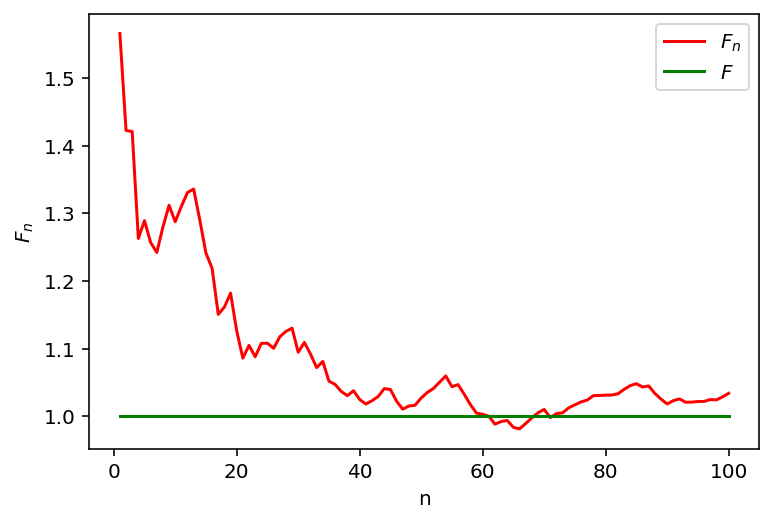

In [21]:
n = 100
x = h(np.random.random(n))
y = 1/np.arange(1, n+1) * np.cumsum(x, axis=0)

plt.plot(np.arange(1, n+1), y, c='r', label=r'$F_n$')
plt.plot(np.arange(1, n+1), np.ones(n), c='g', label=r'$F$')
plt.xlabel(r'n')
plt.ylabel(r'$F_n$')
plt.legend()
plt.show()

By running the above code fragment several times, you can see that the trend is for the graph to start off rather chaotic, but, on average, it slowely starts approaching the correct value of $1$ for increasing $n$. Note that the approximation doesn't strictly improve as $n$ increases (it does not monotonically approach $1$, but fluctuates around this value). It is only on average that the error decreases.

One way to visualize this average trend explicitly is by simulating many *replicates* of the Monte Carlo estimator and plotting all the replicates together. The code fragment below runs and plots 1000 such replicates.

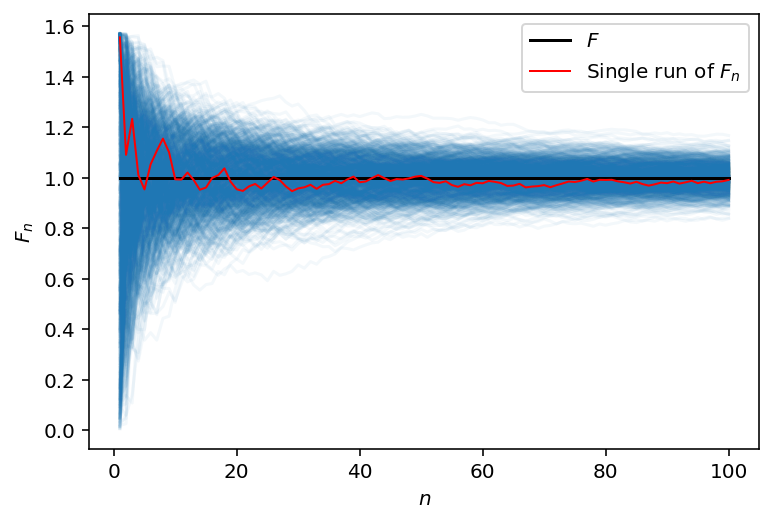

In [22]:
n = 100
runs = 1000

x = h(np.random.random((n, runs)))
y = 1/np.arange(1, n+1)[:, None] * np.cumsum(x, axis=0)

# plot the 1000 independent runs in semitransparent blue
plt.plot(np.arange(1, n+1), y, c="C0", alpha=0.05)
# plot the ground truth value in black
plt.plot(np.arange(1, n+1), np.ones(n), '-k', label=r'$F$')
# highlight a single replicate in red
plt.plot(np.arange(1, n+1), y[:, 0], c='red', linewidth=1, label=r'Single run of $F_n$');
plt.xlabel(r'$n$')
plt.ylabel(r'$F_n$')
plt.legend()
plt.show()

As we can see, the spread of the 1000 replicates starts off large, but the blue cloud of uncertainty around the ground truth value gradually shrinks as $n$ increases.

# Part 4: Convergence rate of the Monte Carlo estimator

Running multiple replicates like above is one way to analyze the error of a Monte Carlo process. It is, however, quite time consuming since it requires running many simulations. We will now use the central limit theorem to derive and explore a more concrete expression for the convergence behavior of this estimator.

The Monte Carlo estimator $F_n$ is the average of $n$ independent and identically distributed (i.i.d.) random numbers. Being a random variable itself, we can therefore reason about the variance, $\V{F_n}$, of $F_n$. The vertical extent of the blue cloud in the graph above is in fact a visualization of this variance (or rather the standard deviation, the square root of variance).

We will now formalize this by considering the central limit theorem  again, but this time for the *average* of $n$ i.d.d. random variables $Z_i$ for $i = 1\ldots n$:

$$
F_n = \frac{1}{n}\sum_{i=1}^{n} Z_i.
$$

## Problem 4.1: Variance of an average

<div class="alert alert-info" role="alert">

**TODO:** Write a small Python function to compute $\V{F_n}$ in terms of $n$ and the variance of $Z$, $\V{Z} = \V{F_1}$.
</div>

*Hint: use the properties of variance we learned in class. The body of your function below should be an extremely simple 1-liner.*

In [23]:
# Create a new function to compute the variance in terms of n and the variance of Z.
def variance_of_average(n, varZ):
    return varZ / n

## Problem 4.2: Convergence to the normal distribution
<div class="alert alert-info" role="alert">

**TODO:** Now, duplicate your solution from [Problem 1.6](#Problem-1.6:-Convergence-to-the-Normal-Distribution), but make these changes:

1. Instead of uniform random variables $X$, use random variables $Z = h(X)$ (by passing uniform random numbers to the function `h(x)`).
2. Instead of a sum, compute the *average* of these $n$ random values.
3. To estimate the parameters of the normal distribution, use $\mu = 1$ and a variance computed using your `variance_of_average(n,varZ)` function with `varZ = 0.23`.
</div>

In [24]:
@interact(n = (1, 20))
def central_limit_theorem_average(n = 1): # The default parameter is the default slider position.
    # Create a figure for the plot.
    fig = plt.figure()
    
    # Add the subplot, as appropriate
    ax = fig.add_subplot(1, 1, 1)
    
    # Generate samples, this time a 100000 x n matrix of transformed random variables.
    array_samples = h(np.random.uniform(size = (100000, n)))
    
    # Average the elements in each column.
    histogram_samples = np.mean(array_samples, axis = 1)
    
    # Create the histogram, using a normalized probability density with 50 bins.
    _, x, _ = plt.hist(histogram_samples, bins = 50, density = True, label = 'Histogram')
    
    # To estimate the parameters of the normal distribution, use mu = 1 and varZ = 0.23.
    mu = 1
    varZ = 0.23
    
    # Set the standard deviation of the normal based on the created function.
    sigma = variance_of_average(n, varZ)
    
    # Superimposing a plot of the normal distribution over the histogram.
    plt.plot(x, normal_distr(x, mu, np.sqrt(sigma)), '-g', label = 'Normal Distribution')
    
    # Add a legend.
    plt.legend()
    
    # Title the plot.
    plt.title("Central Limit Theorem (Random Transformed Samples): n = {} ".format(n))
    
    # Display the plot.
    plt.show()

interactive(children=(IntSlider(value=1, description='n', max=20, min=1), Output()), _dom_classes=('widget-int…

### Observations and Insights

For each value of $n$, the resulting histogram is a visualization of the "spread" of many evaluations of $F_n$ (the *horizontal* blue histogram here corresponds to the *vertical* spread of the blue $F_n$ replicate runs in our previous plot).

By playing around with the slider, we can see that for $n=1$ the distribution of $F_1$ is clearly asymmetric and not normal. Nevertheless, as we increase $n$, the histogram of the average $F_n$ increasingly matches the normal distribution which also becomes increasingly concentrated around the correct answer to our integral $F = 1$.

Your visualization and `variance_of_average(n, varZ)` function above indicate that the variance of Monte Carlo integration, $\V{F_n} = \frac{\V{Z}}{n}$, is a function of two things: 1) the number of samples $n$ being averaged, and 2) the variance of a single sample $Z = \frac{f(X)}{p_X(X)}$. This suggests we can reduce error either by increasing $n$, or by drawing our samples $X$ from a distribution $p_X$ that is more "similar to" the integrand $f$, which in turn reduces the variance of $Z$ (a process known as importance sampling which we'll explore next).

Since Monte Carlo variance is $O(n^{-1})$, the error (square root of variance, or *standard deviation*) is hence on the order of $O\left(n^{-\frac{1}{2}}\right)$ for work of $O(n)$. We can demonstrate this convergence rate more explicitly by plotting the standard deviation of $F_n$ on a log-log scale, where a function like $n^{-\frac{1}{2}}$ should look like a straight line with slope $-\frac{1}{2}$.

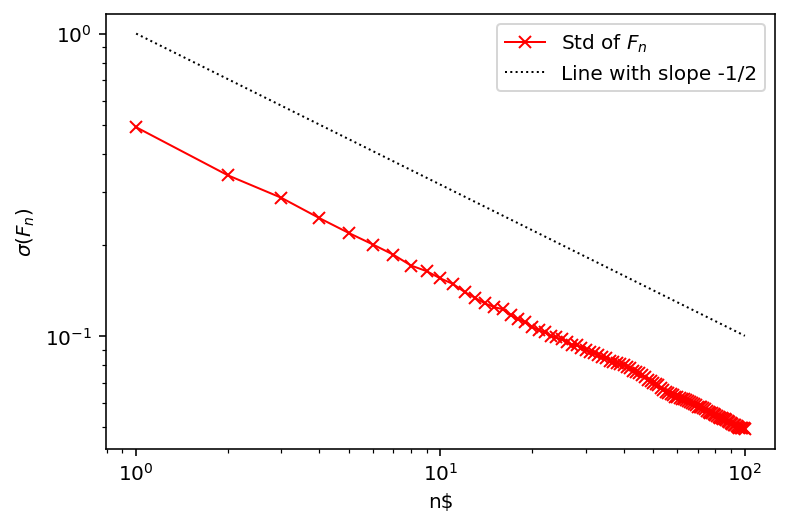

In [25]:
n = 100
runs = 1000

x = h(np.random.random((n, runs)))
y = 1/np.arange(1, n+1)[:, None] * np.cumsum(x, axis=0)

n = np.arange(1, n+1)
plt.loglog(n, np.std(y, axis=1, ddof=1), marker='x', c='red', linewidth=1, label=r'Std of $F_n$');
plt.loglog(n, n**(-0.5), ':k', linewidth=1, label=r'Line with slope -1/2');
plt.legend()
plt.xlabel(r'n$')
plt.ylabel(r'$\sigma(F_n)$')
plt.show()

While for this example we considered a simple $1d$ integral, this convergence rate holds for arbitrarily $d$. Deterministic quadrature, on the other hand, can achieve an error of $O(n^{-2})$ for work on the order of $O(d^n)$. For $d=1$, like our example here, deterministic quadrature's error rate of $O(n^{-2})$ is clearly superior to Monte Carlo's $O(n^{-1/2})$. Monte Carlo is a poor choice for low-dimensional integrals, but as $d$ increases, deterministic quadrature's cost grows exponentially, leading to the curse of dimensionality.

## Importance sampling (no tasks, just extra exploration)

Recall from [Problem 2.1](#Problem-2.1:-Linear-ramp) that the pdf of the square root of a uniform random variable takes the shape of a linearly increasing ramp. Since this linear ramp matches the shape of our integrand $f(x) = \sin(x)$ better than a uniform distribution, using this as the basis for our Monte Carlo estimator should in turn result in lower variance for the random variable $Z = h(X)$.

To accomplish this, we've already done the heavy lifting for you by defining a new function $h^\text{is}(x)$ that takes a uniform random variable $X \in [0,1)$, transforms it to $Y$ with linearly increasing density between $[0, \frac{\pi}{2})$, before passing it to the integrand and dividing by the pdf. Using this new function, our Monte Carlo estimator using importance sampling becomes:

$$
\begin{align}
F_n^\text{is} &= \frac{1}{n}\sum_{i=1}^n h^\text{is}(x_i)\\
&= \frac{1}{n}\sum_{i=1}^n \frac{\sin(y_i)}{\frac{8 y_i}{\pi^2}}.
\end{align}
$$

Below we've defined a Python version of this function `h_is`. Note that compared to transforming by our original $h$, the histogram when transforming by $h^\text{is}$ is more compact.

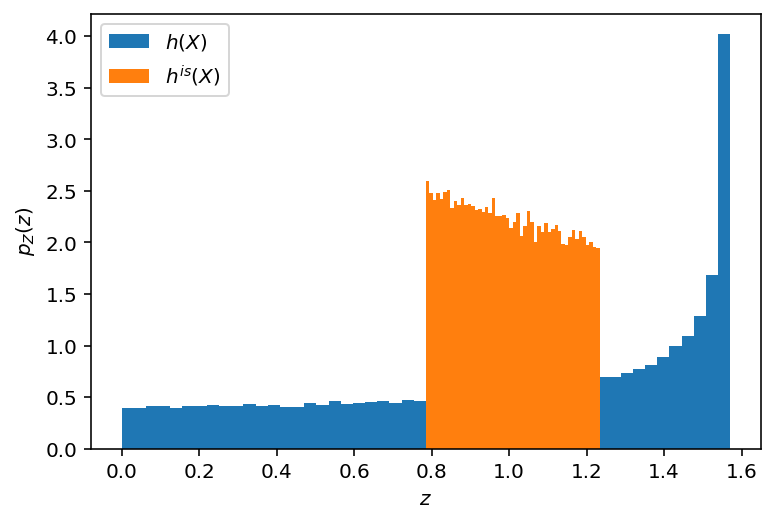

In [26]:
def h_is(x):
    y = np.pi * 0.5 * np.sqrt(x)
    py = 8 * y / np.pi**2
    return np.sin(y) / py

X = np.random.uniform(size=100000)
Z = h(X)
Z_is = h_is(X)

plt.hist(Z, bins=50, density=True, label=r'$h(X)$')
plt.hist(Z_is, bins=50, density=True, label=r'$h^{is}(X)$')
plt.xlabel(r'$z$')
plt.ylabel(r'$p_Z(z)$')
plt.legend()
plt.show()

We can evaluate this estimator $F^\text{is}_n$ for increasing values of $n$ and compare to the original estimator $F_n$:

In [27]:
# Monte Carlo integration
print(f'{"n":>11} {"F_n":9} {"F^is_n":9} {"|F_n-F|":8} {"|F^is_n-F|":8}')
for n in 4**np.array([1,2,3,4,5,6,7,8,9,10]):
    x   = np.random.uniform(0, 1, n)
    h1  = h(x)
    h2  = h_is(x)
    sol1 = np.mean(h1)
    sol2 = np.mean(h2)
    print(f'{n:11d} {sol1:+1.6f} {sol2:+1.6f} {np.abs(sol1-1):1.6f} {np.abs(sol2-1):1.6f}')

          n F_n       F^is_n    |F_n-F|  |F^is_n-F|
          4 +1.290839 +0.922503 0.290839 0.077497
         16 +0.833445 +1.044505 0.166555 0.044505
         64 +0.921887 +1.020446 0.078113 0.020446
        256 +0.982170 +1.002999 0.017830 0.002999
       1024 +0.982942 +1.003491 0.017058 0.003491
       4096 +1.004191 +0.998194 0.004191 0.001806
      16384 +1.000701 +0.999897 0.000701 0.000103
      65536 +1.001117 +0.999747 0.001117 0.000253
     262144 +0.999344 +1.000156 0.000656 0.000156
    1048576 +1.000273 +0.999910 0.000273 0.000090


By comparing 1000 replicates of both $F_n$ and $F^\text{is}_n$, we can see that the importance sampling estimator does indeed seem to hover closer to the correct value of $1$.

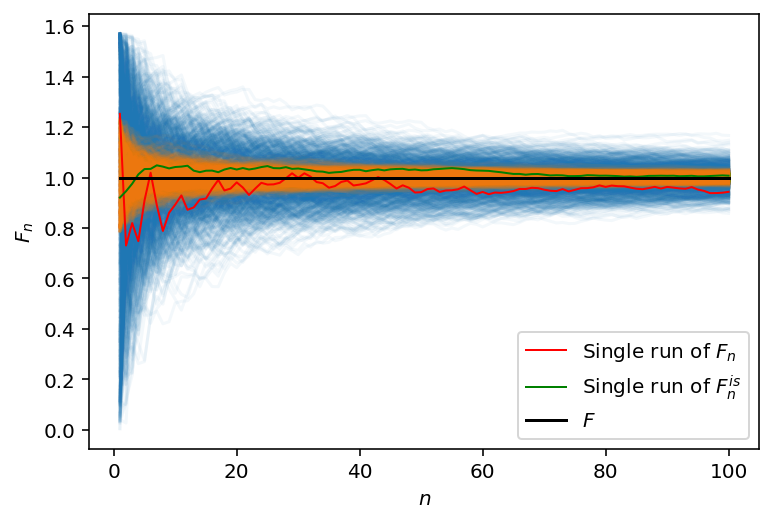

In [28]:
n = 100
runs = 1000

x1 = h(np.random.random((n, runs)))
y1 = 1/np.arange(1, n+1)[:, None] * np.cumsum(x1, axis=0)

x2 = h_is(np.random.random((n, runs)))
y2 = 1/np.arange(1, n+1)[:, None] * np.cumsum(x2, axis=0)

# plot the 1000 independent runs in semitransparent blue and orange
plt.plot(np.arange(1, n+1), y1, c="C0", alpha=0.05)
plt.plot(np.arange(1, n+1), y2, c="C1", alpha=0.05)
# highlight a single replicate in red
plt.plot(np.arange(1, n+1), y1[:, 0], c='red', linewidth=1, label=r'Single run of $F_n$');
plt.plot(np.arange(1, n+1), y2[:, 0], c='green', linewidth=1, label=r'Single run of $F_n^{is}$');
# plot the ground truth value
plt.plot(np.arange(1, n+1), np.ones(n), '-k', label=r'$F$')

plt.xlabel(r'$n$')
plt.ylabel(r'$F_n$')
plt.legend()
plt.show()

And finally, we can compare the histograms of the two estimators and see their respective convergence to the normal distribution.

In [29]:
@interact(n=(1, 20))
def central_limit_theorem_importance_sampling(n=1):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    # Look at the sum of n realizations of sampling many random numbers from any distribution (here uniform)
    x = np.random.uniform(size=(1000, n))
    samples1 = h(x)
    means1 = np.mean(samples1, axis=1)
    samples2 = h_is(x)
    means2 = np.mean(samples2, axis=1)
    
    # Plot normalized histogram & extract the x position of the bins
    _, x1, _ = ax.hist(means1, bins=50, density=True, label=r'Empirical $F_n$')

    # Plot normalized histogram & extract the x position of the bins
    _, x2, _ = ax.hist(means2, bins=50, density=True, label=r'Empirical $F^{is}_n$')
    
    # Estimate parameters for normal distribution
    mu = 1
    sigma2 = variance_of_average(n, 0.23)
    
    # Plot corresponding normal distribution
    y1 = normal_distr(x1, mu, np.sqrt(sigma2))
    ax.plot(x1, y1, linewidth=2, color='red', linestyle='--', label=r'Normal fit to $F_n$')
    
    # Estimate parameters for normal distribution
    sigma2 = variance_of_average(n, 0.016)
    
    # Plot corresponding normal distribution
    y2 = normal_distr(x2, mu, np.sqrt(sigma2))
    ax.plot(x2, y2, linewidth=2, color='green', linestyle='--', label=r'Normal fit to $F^{is}_n$')
    
    ax.set_xlim([-0.5, 2])
    ax.set_ylim([0.0, 10.0])
    
    # Set a title
    ax.set_title(r"Distribution of $F_n$ and $F^{is}_n$")
    
    # Add a legend
    plt.legend(loc='upper left')
    
    # Display the figure
    plt.show()

interactive(children=(IntSlider(value=1, description='n', max=20, min=1), Output()), _dom_classes=('widget-int…

By plotting the variance of $F_n$ and $F^\text{is}_n$ on a log-log plot, we can see that importance sampling doesn't actually change the convergence rate of the estimator, it simply scales the variance (changes the y-intercept on the log-log scale):

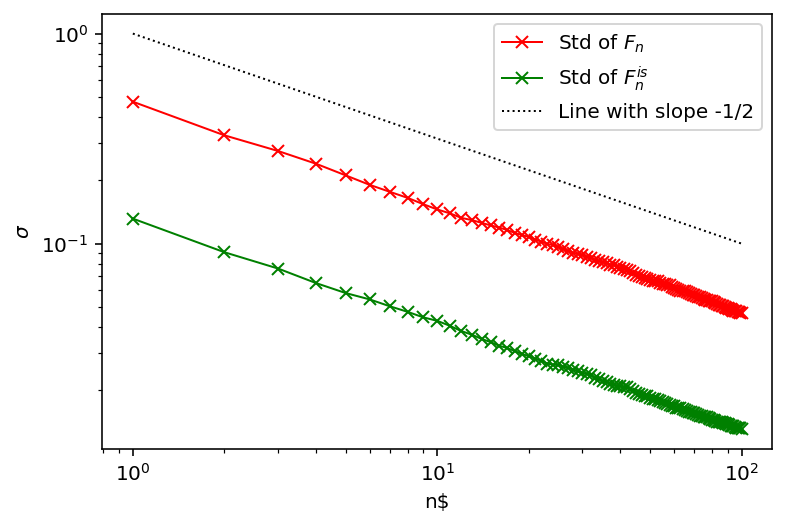

In [30]:
n = 100
runs = 1000

x = np.random.random((n, runs))
h1 = h(x)
y1 = 1/np.arange(1, n+1)[:, None] * np.cumsum(x1, axis=0)

h2 = h_is(x)
y2 = 1/np.arange(1, n+1)[:, None] * np.cumsum(x2, axis=0)

n = np.arange(1, n+1)
plt.loglog(n, np.std(y1, axis=1, ddof=1), marker='x', c='red', linewidth=1, label=r'Std of $F_n$');
plt.loglog(n, np.std(y2, axis=1, ddof=1), marker='x', c='green', linewidth=1, label=r'Std of $F^{is}_n$');
plt.loglog(n, n**(-0.5), ':k', linewidth=1, label=r'Line with slope -1/2');
plt.legend()
plt.xlabel(r'n$')
plt.ylabel(r'$\sigma$')
plt.show()

## Submitting Your Work

Before handing in via Canvas, make sure:
  * Your notebook runs from top to bottom after selecting "Kernel->Restart & Run All" without causing any errors. To simplify the grading process, please do **not** clear the generated output.
  * You have included any scans/images that your notebook references.
  * You have renamed the provided notebook according to your name and netid as: **[YourFirstName]\_[YourLastName]\_[YourNetId]\_[Assignment].ipynb**. For example, if John Doe has netid **F00237S**, his submission filename for PA1 should be **John_Doe_F00237S_PA1.ipynb**.